# Self Organizing Maps - SOM
## The Cyclic Tour

In [16]:
import numpy as np

In [17]:
data = np.array(
    [0.4000, 0.4439,
    0.8439, -0.1463,
    -0.1707, 0.2293,
    0.2293, 0.7610,
    1.5171, 0.9414,
    0.8732, 0.6536,
    0.6878, 0.5219,
    0.8488, 0.3609,
    0.3683, -0.2536,
    1.4195, 0.2634]
    )

data = data.reshape((10,2))
data

array([[ 0.4   ,  0.4439],
       [ 0.8439, -0.1463],
       [-0.1707,  0.2293],
       [ 0.2293,  0.761 ],
       [ 1.5171,  0.9414],
       [ 0.8732,  0.6536],
       [ 0.6878,  0.5219],
       [ 0.8488,  0.3609],
       [ 0.3683, -0.2536],
       [ 1.4195,  0.2634]])

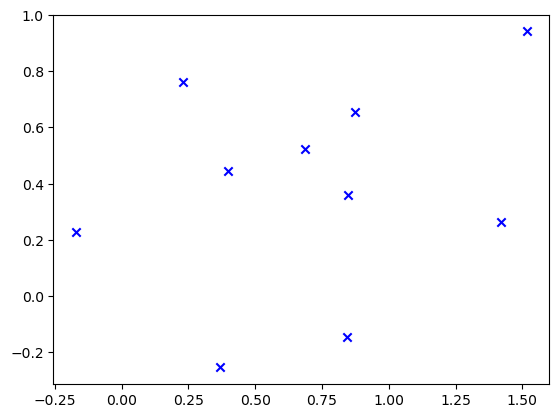

In [18]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1], c='b', label='Cities', marker='x')

### Algorithm: for each sample
1. Calculate the similarity between the input pattern and the weights arriving
at each output node.
2. Find the most similar node; often referred to as the winner.
3. Select a set of output nodes which are located close to the winner in the
output grid. This is called the neighbourhood.
4. Update the weights of all nodes in the neighbourhood such that their
weights are moved closer to the input pattern.

--------------

In [19]:
import math

class SOM:
    def __init__(self, output_shape, data_dimensionality, step_size, neighborhood_size):
        self.output_shape = output_shape
        self.weight_matrix = np.random.random((output_shape, data_dimensionality))
        # self.weight_matrix = np.ones((output_shape, data_dimensionality))
        self.step_size = step_size
        self.neighborhood_size = neighborhood_size

    def find_winner(self, sample):
        distances = []
        for row in range(self.weight_matrix.shape[0]):
            d = np.linalg.norm(sample - self.weight_matrix[row,:])
            distances.append(d)
            # print("{}: {}".format(row, d))
        
        winner = np.argmin(np.array(distances))
        # print("winner is: {}".format(winner))
        return winner

    def get_neighborhood(self, winner):
        neighborhood = []

        for row in range(self.weight_matrix.shape[0]):
            dabs = abs(winner - row)
            if (dabs < self.output_shape/2):
                d = dabs
            elif (dabs > self.output_shape/2):
                d = self.output_shape - dabs
            else:
                d = dabs
            
            if (d <= self.neighborhood_size):
                # print("{} is neighbor".format(row))
                neighborhood.append(row)

        return neighborhood
    
    def update_weights(self, neighborhood, sample):
        for row in range(self.weight_matrix.shape[0]):
            if row in neighborhood:
                # print("{} is in neighbors".format(row))
                # print("old row{}: {}".format(row, self.weight_matrix[row]))
                new_row = self.weight_matrix[row] + (sample - self.weight_matrix[row]) * self.step_size
                self.weight_matrix[row] = new_row
                # print("new_row {}: {}".format(row, new_row))

    def fit(self, X, n_epochs):
        t1 = 7
        t2 = 14
        t3 = 25
        for e in range(n_epochs):
            if (e == t1):
                self.neighborhood_size += -1
            if (e == t2):
                self.neighborhood_size += -1
            if (e == t3):
                self.neighborhood_size += -1

            print("{}: {}".format(e, self.neighborhood_size))

            for row in range(X.shape[0]):
                winner = self.find_winner(X[row])
                neighborhood = self.get_neighborhood(winner)

                self.update_weights(neighborhood, X[row])

In [20]:
som = SOM(10, 2, 0.2, 2)

In [21]:
som.weight_matrix

array([[0.41874766, 0.81740474],
       [0.42224025, 0.0560212 ],
       [0.2047503 , 0.64327261],
       [0.71932495, 0.2164057 ],
       [0.63095582, 0.40103567],
       [0.56931441, 0.56727127],
       [0.81938988, 0.60279912],
       [0.06195319, 0.09014814],
       [0.06208601, 0.17614888],
       [0.91981208, 0.68802999]])

Given a data point:

In [22]:
data[0]

array([0.4   , 0.4439])

Compute the winning position:

In [23]:
w = som.find_winner(data[0])
w

5

Check the neighborhood:

In [24]:
n = som.get_neighborhood(w)
n

[3, 4, 5, 6, 7]

Apply updates to the neighbors:

In [25]:
som.update_weights(n, data[0])
som.weight_matrix

array([[0.41874766, 0.81740474],
       [0.42224025, 0.0560212 ],
       [0.2047503 , 0.64327261],
       [0.65545996, 0.26190456],
       [0.58476465, 0.40960853],
       [0.53545153, 0.54259702],
       [0.73551191, 0.57101929],
       [0.12956255, 0.16089851],
       [0.06208601, 0.17614888],
       [0.91981208, 0.68802999]])

#### We should be ready to fit

In [26]:
som.fit(data, 20)

0: 2
1: 2
2: 2
3: 2
4: 2
5: 2
6: 2
7: 1
8: 1
9: 1
10: 1
11: 1
12: 1
13: 1
14: 0
15: 0
16: 0
17: 0
18: 0
19: 0


In [27]:
winnrz = []

for row in range(data.shape[0]):
    winnrz.append( (row, som.find_winner(data[row])) )

In [28]:
sorted_winnrz = sorted(winnrz, key=lambda x: x[1])
sorted_winnrz

[(9, 0),
 (7, 1),
 (1, 2),
 (8, 3),
 (2, 4),
 (3, 5),
 (0, 6),
 (6, 7),
 (5, 8),
 (4, 9)]

In [29]:
som.weight_matrix

array([[ 1.37683655,  0.31826249],
       [ 0.90959243,  0.31560976],
       [ 0.79384227, -0.11399047],
       [ 0.35504515, -0.20446797],
       [-0.09011123,  0.16151286],
       [ 0.20713679,  0.69295868],
       [ 0.41628857,  0.47944901],
       [ 0.66187788,  0.54130901],
       [ 0.89753203,  0.65894278],
       [ 1.45080551,  0.8436025 ]])

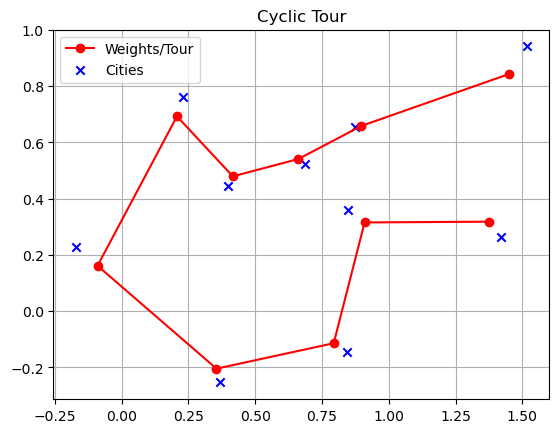

In [30]:
import matplotlib.pyplot as plt
plt.title("Cyclic Tour")
plt.plot(som.weight_matrix[:,0], som.weight_matrix[:,1], c='r', label='Weights/Tour', marker='o')
plt.scatter(data[:,0], data[:,1], c='b', label='Cities', marker='x')
plt.grid(True)
plt.legend()

plt.show()

https://diego.codes/post/som-tsp/